In [2]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
import xgboost as xgb
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
import pandas as pd, numpy as np
import matplotlib as mpl
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import cross_validate
from sklearn.pipeline import make_pipeline
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.metrics import confusion_matrix,precision_score,recall_score,roc_auc_score
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score,ConfusionMatrixDisplay
import joblib
from sklearn.inspection import permutation_importance
from sklearn.svm import SVC
import warnings
warnings.filterwarnings('ignore')
from imblearn.over_sampling import SMOTE
from sklearn.datasets import make_classification
from collections import Counter
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import VotingClassifier
from imblearn.ensemble import BalancedBaggingClassifier
from imblearn.ensemble import BalancedRandomForestClassifier, RUSBoostClassifier
from imblearn.under_sampling import NearMiss
from sklearn.cluster import MiniBatchKMeans
from imblearn.under_sampling import ClusterCentroids
from imblearn.under_sampling import CondensedNearestNeighbour  
from imblearn.under_sampling import EditedNearestNeighbours #把多分类改成二分类了
from imblearn.under_sampling import RepeatedEditedNearestNeighbours#把多分类改成二分类了
from imblearn.under_sampling import AllKNN
from sklearn.metrics import matthews_corrcoef
from imblearn.combine import SMOTEENN
from sklearn.preprocessing import StandardScaler
import shap

In [3]:
# mpl.rcParams['font.sans-serif']=['SimHei']
# mpl.rcParams['axes.unicode_minus']=False
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS']


特征重要性：
    feature_name  importance
269     STPQai17    0.018850
46          OSI7    0.015225
150     CSDMHS30    0.014421
270     STPQai18    0.013705
159         IIS1    0.013691
284     STPQai32    0.013244
44          OSI5    0.010066
56         OSI17    0.009042
53         OSI14    0.008559
60          LSS3    0.008455
160         IIS2    0.008020
163         IIS5    0.007786
164         IIS6    0.007696
54         OSI15    0.007681
154     CSDMHS34    0.007294
118       MHLQ27    0.007156
51         OSI12    0.005794
86        MBIGS5    0.005772
48          OSI9    0.005704
47          OSI8    0.005623
23      STPQawt1    0.005619
335      STPQil2    0.005190
161         IIS3    0.005165
342      STPQil9    0.005127
55         OSI16    0.005118
285      STPQea1    0.005052
119       MHLQ29    0.005036
61          LSS4    0.004896
43          OSI4    0.004836
64          PCQ2    0.004683


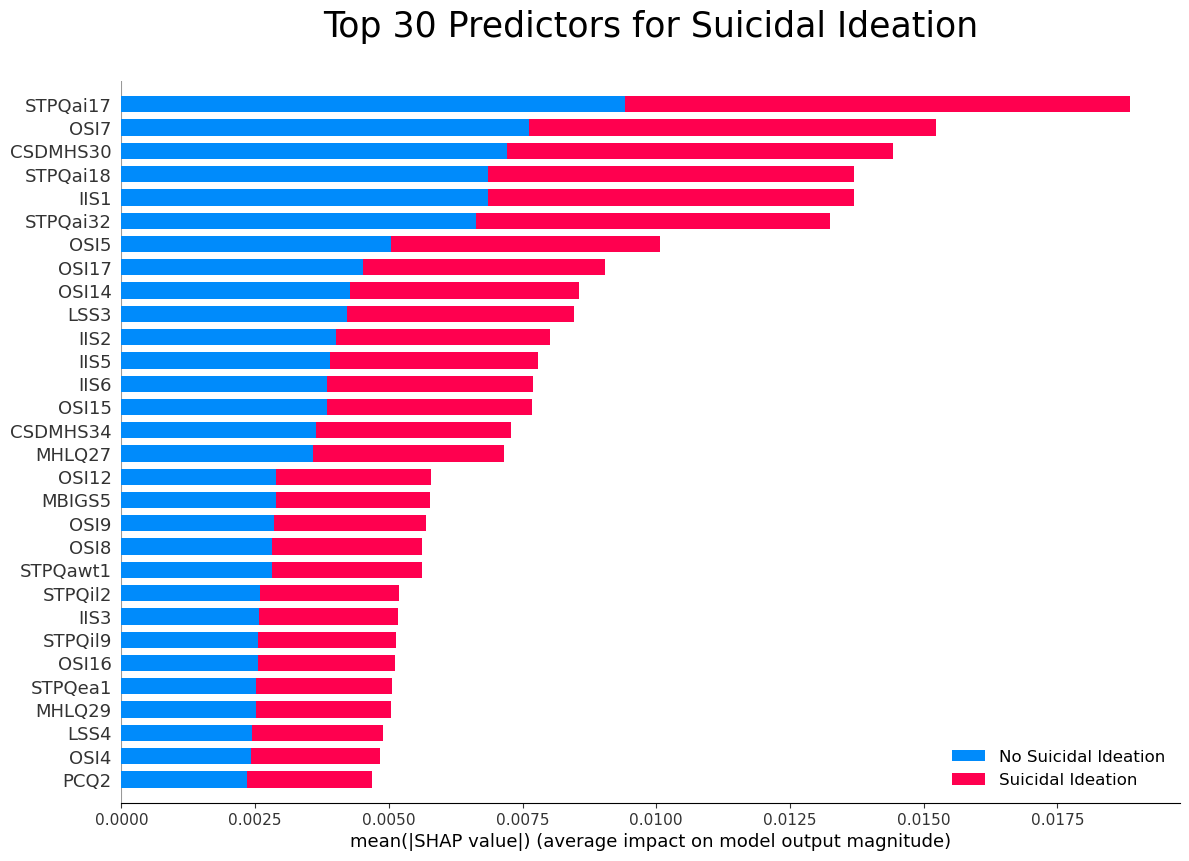

In [5]:
# fpath = r"/Users/wangxiaoyan/Documents/wy/论文/git/scientific-worker-mental-health/data/all/2017科技人员心理健康-填充处理后数据.csv"
fpath = r"/Users/wangxiaoyan/Documents/wy/论文/git/scientific-worker-mental-health/data/all/2017科技人员心理健康-空值填充处理后数据.csv"

Dataset = pd.read_csv(fpath)
number = 30
Dataset = Dataset.drop('depression', axis=1)
Dataset = Dataset.drop('anxiety', axis=1)

y = Dataset['suicide']
x = Dataset.drop('suicide', axis=1)


feature_names = np.array(x.columns)

names = x.columns
names = list(names)
random_state = 42
scaler = StandardScaler()
X_scaled = scaler.fit_transform(x)
x_train, x_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=random_state)
x_train = pd.DataFrame(x_train, columns=feature_names)
x_test = pd.DataFrame(x_test, columns=feature_names)

rfc = RandomForestClassifier(n_estimators=100,random_state=random_state)

rfc.fit(x_train, y_train)
%matplotlib inline

explainer = shap.TreeExplainer(rfc)
shap_values = explainer.shap_values(x_train)
# 计算特征重要性
feature_importance = np.sum([np.abs(class_shap_values).mean(axis=0) for class_shap_values in shap_values], axis=0)

feature_importance_df = pd.DataFrame(
    {'feature_name': feature_names, 'importance': feature_importance}
)

# 按特征重要性降序排序
sorted_feature_importance_df = feature_importance_df.sort_values(
    by='importance', ascending=False
)
top_features = sorted_feature_importance_df.head(30)

print("特征重要性：")
print(top_features)

class_names = [
     'Suicidal Ideation',
     'No Suicidal Ideation'
]
# 绘制SHAP总结图
# 绘制SHAP总结图
plt.subplots()
shap.summary_plot(shap_values, x_train, max_display=30, plot_size=(12, 8), class_names=class_names,show=False, plot_type='bar')
plt.title('Top 30 Predictors for Suicidal Ideation', fontsize = 25, y = 1.05)
plt.show()
plt.close()
    

原始数据集类别分布： Counter({0: 6535, 1: 5725, 2: 788, 3: 236})
[0 1 2 3]
特征重要性：
   feature_name  importance
44         OSI5    0.058782
40         OSI1    0.054089
43         OSI4    0.042436
47         OSI8    0.040873
48         OSI9    0.040055
46         OSI7    0.037368
50        OSI11    0.032829
51        OSI12    0.032138
52        OSI13    0.031062
45         OSI6    0.030038
49        OSI10    0.024400
42         OSI3    0.020491
54        OSI15    0.019899
56        OSI17    0.017472
41         OSI2    0.017318
19        PSQI2    0.016390
60         LSS3    0.015445
58         LSS1    0.015326
55        OSI16    0.014255
53        OSI14    0.013400
57        OSI18    0.013042
34        WFCS5    0.011120
89       MBIGS8    0.011116
33        WFCS4    0.010550
82       MBIGS1    0.010388
86       MBIGS5    0.010212
85       MBIGS4    0.009749
84       MBIGS3    0.008940
30        WFCS1    0.008348
83       MBIGS2    0.008250


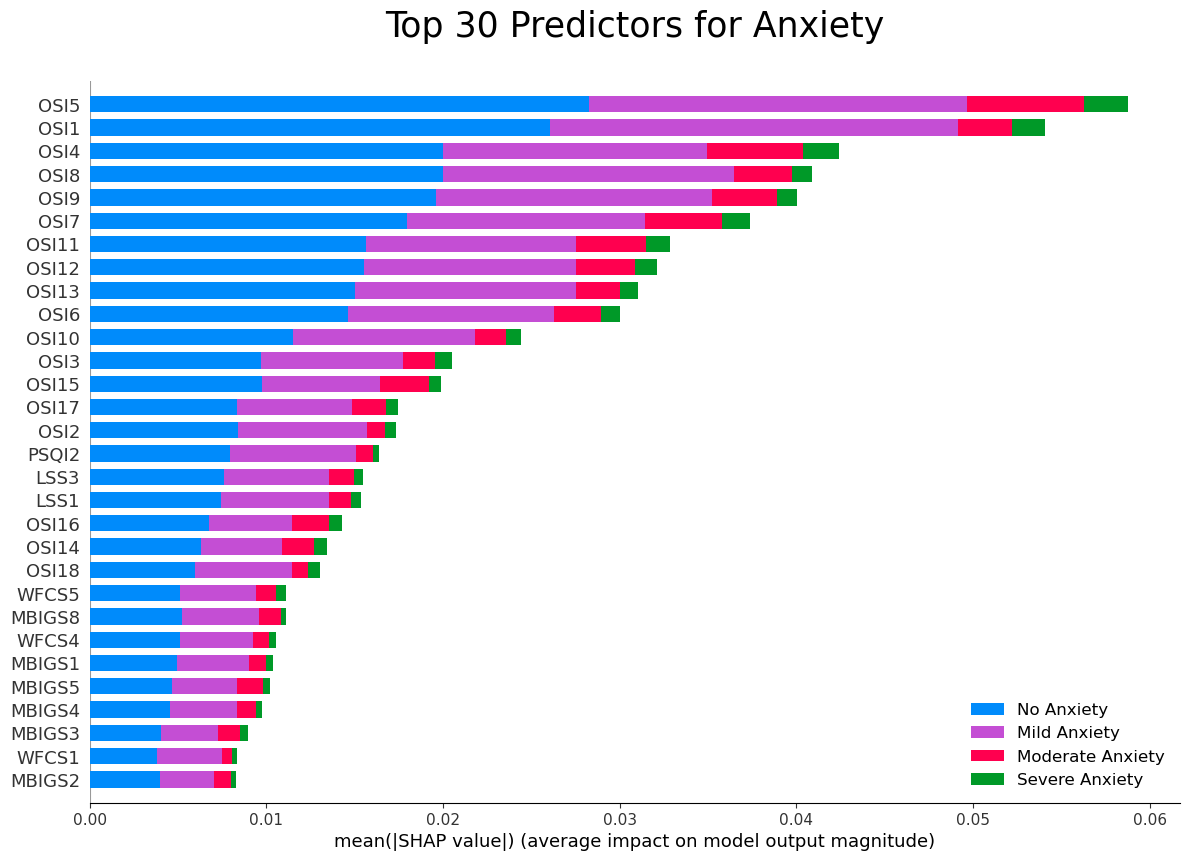

In [4]:
# fpath = r"/Users/wangxiaoyan/Documents/wy/论文/git/scientific-worker-mental-health/data/all/2017科技人员心理健康-填充处理后数据.csv"
fpath = r"/Users/wangxiaoyan/Documents/wy/论文/git/scientific-worker-mental-health/data/all/2017科技人员心理健康-空值填充处理后数据.csv"

Dataset = pd.read_csv(fpath)
number = 30
Dataset = Dataset.drop('depression', axis=1)
Dataset = Dataset.drop('suicide', axis=1)
y = Dataset['anxiety']
x = Dataset.drop('anxiety', axis=1)
print('原始数据集类别分布：', Counter(y))

feature_names = np.array(x.columns)
random_state = 42
scaler = StandardScaler()
X_scaled = scaler.fit_transform(x)
x_train, x_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=random_state)
x_train = pd.DataFrame(x_train, columns=feature_names)
x_test = pd.DataFrame(x_test, columns=feature_names)

rfc = RandomForestClassifier(n_estimators=100,min_samples_leaf=2,min_samples_split=10,random_state=random_state)

rfc.fit(x_train, y_train)
print(rfc.classes_)

%matplotlib inline

explainer = shap.TreeExplainer(rfc)
shap_values = explainer.shap_values(x_train)
# 计算特征重要性
feature_importance = np.sum([np.abs(class_shap_values).mean(axis=0) for class_shap_values in shap_values], axis=0)

feature_importance_df = pd.DataFrame(
    {'feature_name': feature_names, 'importance': feature_importance}
)

# 按特征重要性降序排序
sorted_feature_importance_df = feature_importance_df.sort_values(
    by='importance', ascending=False
)
top_features = sorted_feature_importance_df.head(30)

print("特征重要性：")
print(top_features)

class_names = [
     'No Anxiety',
     'Mild Anxiety',
     'Moderate Anxiety',
     'Severe Anxiety'
]
# 绘制SHAP总结图
plt.subplots()
shap.summary_plot(shap_values, x_train, max_display=30, plot_size=(12, 8), class_names=class_names,show=False, plot_type='bar')
plt.title('Top 30 Predictors for Anxiety', fontsize = 25, y = 1.05)
plt.show()
plt.close()
    


原始数据集类别分布： Counter({0: 10920, 1: 2077, 2: 287})
[0 1 2]
特征重要性：
   feature_name  importance
46         OSI7    0.030080
50        OSI11    0.025039
47         OSI8    0.023278
43         OSI4    0.021578
40         OSI1    0.020882
44         OSI5    0.019754
48         OSI9    0.019173
53        OSI14    0.012385
42         OSI3    0.011911
52        OSI13    0.011595
45         OSI6    0.011165
51        OSI12    0.011163
89       MBIGS8    0.010877
54        OSI15    0.010385
39       WFCS10    0.010323
86       MBIGS5    0.009192
49        OSI10    0.009051
88       MBIGS7    0.008770
41         OSI2    0.008710
55        OSI16    0.008489
60         LSS3    0.007903
37        WFCS8    0.007089
56        OSI17    0.006933
82       MBIGS1    0.006684
90       MBIGS9    0.006616
87       MBIGS6    0.006401
57        OSI18    0.006397
33        WFCS4    0.005621
75        PCQ13    0.005324
23     STPQawt1    0.005216


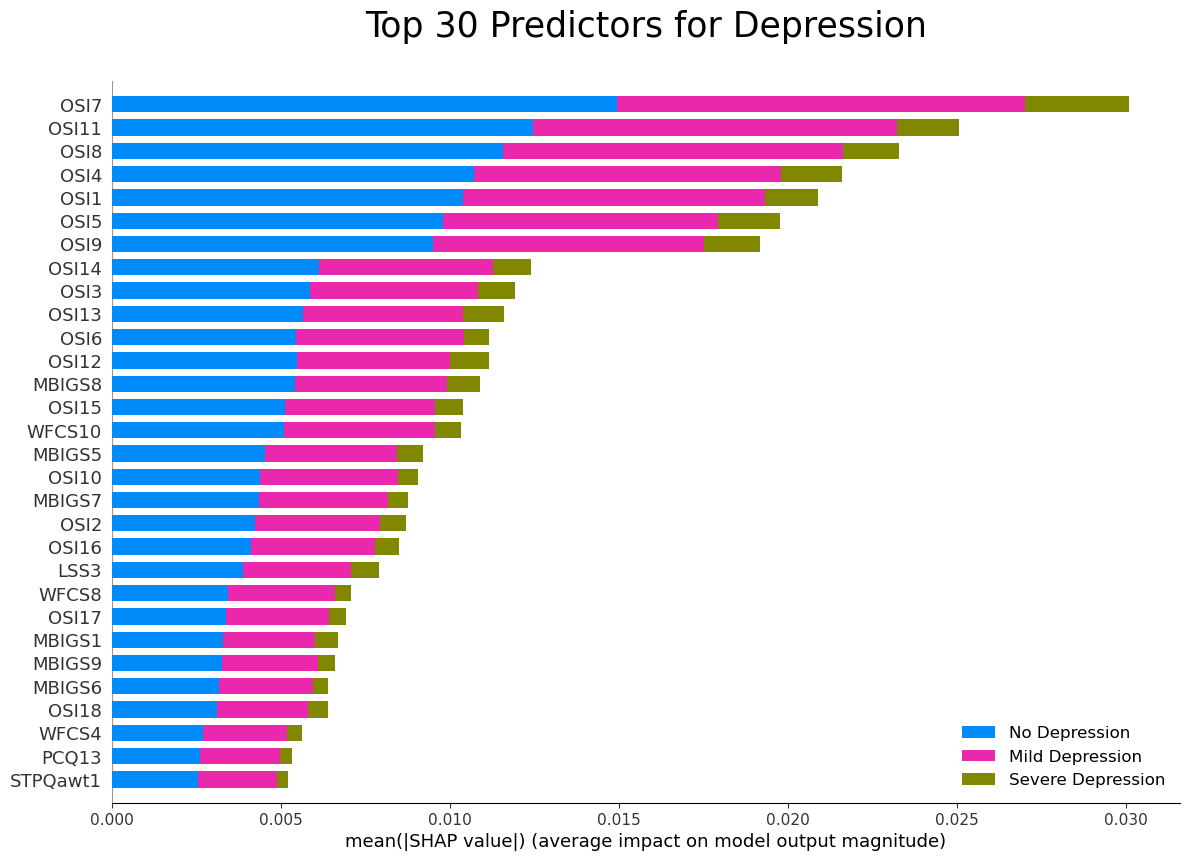

In [3]:
# fpath = r"/Users/wangxiaoyan/Documents/wy/论文/git/scientific-worker-mental-health/data/all/2017科技人员心理健康-填充处理后数据.csv"
fpath = r"/Users/wangxiaoyan/Documents/wy/论文/git/scientific-worker-mental-health/data/all/2017科技人员心理健康-空值填充处理后数据.csv"

Dataset = pd.read_csv(fpath)
number = 30
Dataset = Dataset.drop('anxiety', axis=1)
Dataset = Dataset.drop('suicide', axis=1)

y = Dataset['depression']
x = Dataset.drop('depression', axis=1)

print('原始数据集类别分布：', Counter(y))

feature_names = np.array(x.columns)

random_state = 42
scaler = StandardScaler()
X_scaled = scaler.fit_transform(x)
x_train, x_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=random_state)
x_train = pd.DataFrame(x_train, columns=feature_names)
x_test = pd.DataFrame(x_test, columns=feature_names)

rfc = RandomForestClassifier(n_estimators=50,max_depth=20,min_samples_leaf=2,min_samples_split=10,random_state=random_state)

rfc.fit(x_train, y_train)
print(rfc.classes_)

%matplotlib inline

explainer = shap.TreeExplainer(rfc)
shap_values = explainer.shap_values(x_train)
# 计算特征重要性
feature_importance = np.sum([np.abs(class_shap_values).mean(axis=0) for class_shap_values in shap_values], axis=0)

feature_importance_df = pd.DataFrame(
    {'feature_name': feature_names, 'importance': feature_importance}
)

# 按特征重要性降序排序
sorted_feature_importance_df = feature_importance_df.sort_values(
    by='importance', ascending=False
)
top_features = sorted_feature_importance_df.head(30)

print("特征重要性：")
print(top_features)
class_names = [
    'No Depression',
    'Mild Depression',
    'Severe Depression'
]
# 绘制SHAP总结图
plt.subplots()
shap.summary_plot(shap_values, x_train, max_display=30, plot_size=(12, 8), class_names=class_names,show=False, plot_type='bar')
plt.title('Top 30 Predictors for Depression', fontsize = 25, y = 1.05)
plt.show()
plt.close()

